In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

2022-11-06 15:18:48.826432: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('datasets/TCS.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=0.1, shuffle=False)
train.shape, test.shape

((1525, 7), (170, 7))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1695 non-null   object 
 1   Open       1695 non-null   float64
 2   High       1695 non-null   float64
 3   Low        1695 non-null   float64
 4   Close      1695 non-null   float64
 5   Adj Close  1695 non-null   float64
 6   Volume     1695 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 92.8+ KB


In [5]:
trainData = train.iloc[:,4:5].values
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1525, 1)

In [6]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [8]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [9]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - loss: 0.0092 - 9s/epoch - 256ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0033 - 4s/epoch - 121ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0024 - 4s/epoch - 122ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0020 - 4s/epoch - 119ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0061 - 4s/epoch - 121ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0020 - 4s/epoch - 121ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0019 - 4s/epoch - 120ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0018 - 4s/epoch - 124ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0016 - 4s/epoch - 123ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0016 - 4s/epoch - 122ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0018 - 4s/epoch - 125ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0014 - 4s/epoch - 121ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0015 - 4s/epoch - 122ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0013 - 4s/epoch - 125ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0014 - 4s/epoch - 122ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0014 - 4s/epoch - 121ms/step
Epoch 17/20
35/35

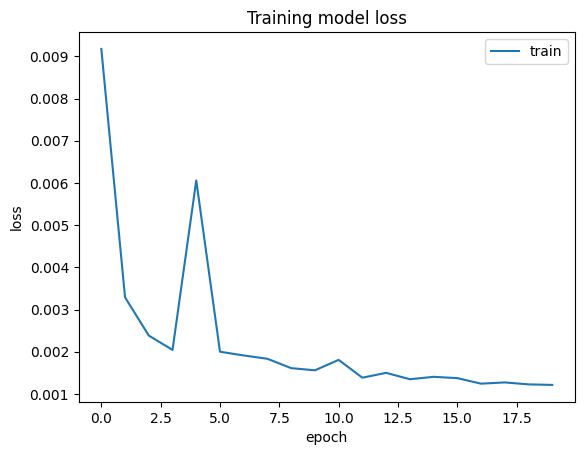

In [10]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [11]:
testData = test
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(110, 60, 1)

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

4/4 [==============================] - 1s 36ms/step


(110, 1)

In [13]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[7.3975477],
       [7.4545336],
       [7.519058 ],
       [7.568207 ],
       [7.5801344],
       [7.555401 ],
       [7.492299 ],
       [7.3961487],
       [7.2896876],
       [7.194617 ],
       [7.1420383],
       [7.1497703],
       [7.2203403],
       [7.318839 ],
       [7.409516 ],
       [7.459672 ],
       [7.44522  ],
       [7.3461776],
       [7.1785736],
       [6.992091 ],
       [6.8309307],
       [6.7178736],
       [6.6791787],
       [6.727706 ],
       [6.8527627],
       [6.99465  ],
       [7.0840616],
       [7.0979633],
       [7.059666 ],
       [7.003021 ],
       [6.9630837],
       [6.953108 ],
       [6.9835896],
       [7.046844 ],
       [7.1247234],
       [7.1945214],
       [7.2463846],
       [7.2661257],
       [7.24771  ],
       [7.187548 ],
       [7.0938354],
       [6.9867005],
       [6.8670797],
       [6.7501984],
       [6.6537375],
       [6.5888457],
       [6.563734 ],
       [6.588278 ],
       [6.651262 ],
       [6.730251 ],


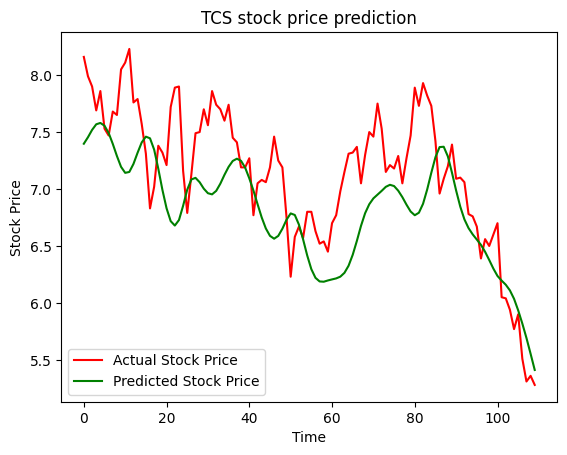

In [14]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('TCS stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
model.save('tcsModel.hdf5')